***Problem 1.3** 


Before we do anything we should first import `numpy`, `pandas`, `matplotlib`, and `seaborn`. We are also going to use Justin's seaborn settings because he gave the class permission to. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

#in-line magic function
%matplotlib inline

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18,
    'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)


plt.close('all')

**Part a** asks us to read the data from the data file into a `DataFrame`. As per the homework policies, the csv file is contained in a subdirectory called `data`.

In [6]:
# read the csv into a dataframe
df = pd.read_csv('./data/gardner_et_al_2011_time_to_catastrophe_dic.csv', comment = '#')

**Part b** asks us if the data is tidy and then asks us to tidy the data. This data is not tidy because the columns (labeled tubulin and unlabeled tubulin) are not separate variables measured for the same observations, but rather two different sets of observations. Also, there are more data points for labeled tubulin than there are for unlabled tubulin. A way to clean up this data is to create two separate data sets. We ultilize `df.dropna()` key word argument.

In [7]:
# splice the data tables

df_labeled = df['time to catastrophe with labeled tubulin (s)']
df_unlabeled = df['time to catastrophe with unlabeled tubulin (s)']


# Drop all NaN values
df_unlabeled_clean = df['time to catastrophe with unlabeled tubulin (s)'].dropna()

**Part c** asks us to plot a histogram of the castasrophe times for labeled and unlabeled tubulin. We used `plt.hist()`. Below are several ways we could have represented our data: 

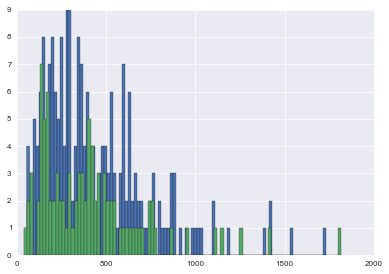

In [8]:
_ = plt.hist(df_labeled, bins = 100, normed = False)
_ = plt.hist(df_unlabeled_clean, bins = 100, normed = False)

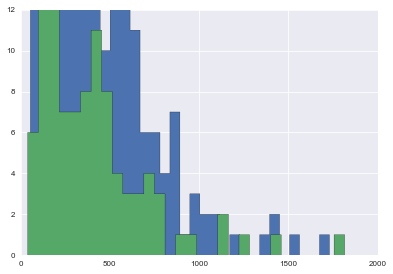

In [9]:
_ = plt.hist(df_labeled, bins = 30, normed = False, histtype = 'stepfilled')
_ = plt.hist(df_unlabeled_clean, bins = 30, normed = False, histtype = 'stepfilled')

When playing around the the number of bins we found that too many bins, as shown in the first plot, made the plot difficult to interpret. The huge number of bins was unnecessary. We can see from the second plot that the `histtype = 'stepfilled'` does not represent the data well; we prefer the default `histtype` for our graph. 

Below is our final histogram.

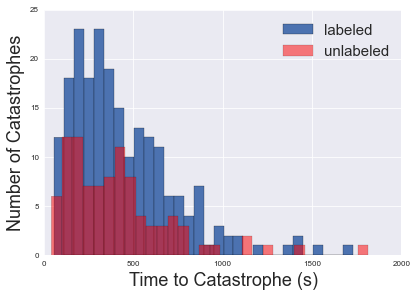

In [10]:
_ = plt.hist(df_labeled, bins = 30, normed = False)
_ = plt.hist(df_unlabeled_clean, bins = 30, normed = False, alpha = 0.5, color="red")
plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Number of Catastrophes')
plt.legend(('labeled', 'unlabeled'), loc='upper right', prop={"size":15})

To allow the viewer to see all of the data and easily compare the two data sets, we changed the transparancy of the histogram for the unlabeled data. The unlabeled histogram overlaps that of the labeled data. We did this using the `alpha` argument setting `alpha = 0.5`. We found that 30 bins represented the distribution of the data well, and we added a legend and axis labels. 

**Part d** asks us to plot the cumulative histogram for the labeled and unlabeled experiments. 

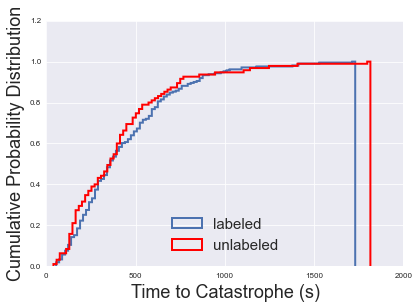

In [11]:
#plot a cumulative  histogram
_ = plt.hist(df_labeled, bins = 100, normed=1, cumulative = True, histtype = 'step', linewidth=2.0)
_ = plt.hist(df_unlabeled_clean, normed=1, bins = 100, cumulative = True, histtype = 'step', linewidth=2.0,  color = 'red')

plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Cumulative Probability Distribution')
plt.legend(('labeled', 'unlabeled'), loc='lower center', prop={"size":15})


We used the `cumulative` argument for `plt.hist()` to create this cumulative distribution plot for us. From a cumulative plot we want the sum of the data points to equal 1, with the y value of the previous data point being added to that of the current data point. In python, the `cumulative` argument for `plt.hist()` will add the previous value to the current value until it hits the last value; it does not manipulate the data so that total sum is equal to 1. This would not give us a probability distribution. In order to achieve this probability distribution, we have to set `normed = 1`. Unlike **part c** we felt that `histtype = 'step'` represented our data well. However, `histtype = 'stepfilled'` did not represent our data clearly; it was difficult to see the difference between the labeled and unlabled experiments, and the same goes for the default `histtype`. Here we felt that an increase `bins` size would represent the dataset best, producing a smoother line that does not look like a staircase. Below we have shown what our cumulative graph would look like if we didn't normalize the data sets, have a small number of bins, and if we used the default `histtype`.

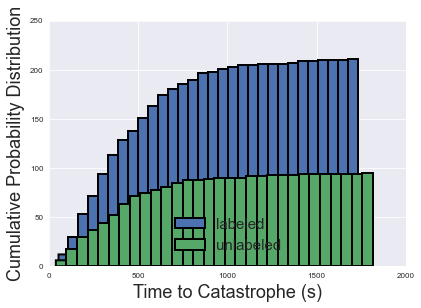

In [13]:
_ = plt.hist(df_labeled, bins = 30, cumulative = True, linewidth=2.0)
_ = plt.hist(df_unlabeled_clean, bins = 30, cumulative = True, linewidth=2.0)

plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Cumulative Probability Distribution')
plt.legend(('labeled', 'unlabeled'), loc='lower center', prop={"size":15})



# Question 2e.

We were asked to plot **cumulative histogram** similar to the ones that appear in Fig. 2a of the *Gardner, Zanic, et al.* paper. Dropping the "NA" values in order to get a tidy dataset came in handy since we were able to separate our dataset in to two dataframes, "Labeled" and "Unlabeled."
Cumulative frequencies have to be calculated before we can plot a histogram. Lets start by sorting the two dataframes in increasing order of time to catastrophe.

In [15]:
sorted_df_labeled = np.sort(df_labeled)
sorted_df_unlabeled = np.sort(df_unlabeled_clean)

Once the dataframes are sorted, we define a set of `timepoints` that we use to calculate cumulative frequencies. We use the `numpy` function `arange` to define a set of 30 values between the minimum and maximum time points at which we will calculate cumulative frequencies. We use the minimum and maximum values from the "Unlabeled" dataframe , within  `arange` function, based on its wider range. We added 30 to the maximum value to include the maximum time point from the "Unlabeled" dataset.

In [16]:
timepoints = np.arange( np.min (df_unlabeled_clean), np.max(df_unlabeled_clean) +30, 30  )

In order to store cumulative frequencies calculated at each time point as an array, we create an empty array using the `numpy` function `zeros`. The number of zeros depends on the length of the variable `timepoints`.

In [17]:
empty_array_labeled = np.zeros( len(timepoints) )
empty_array_unlabeled = np.zeros ( len(timepoints) )

We iterate over the number of `timepoints` using a for loop and using the in-built `sum` function, we calculate the number of entries that have catastrophe time points less than each value of the `timepoints` variable using boolean datatypes.

In [18]:
for i in range( len(timepoints) ):
    empty_array_labeled[i] = np.sum (sorted_df_labeled < timepoints[i])
    empty_array_unlabeled [i] = np.sum (sorted_df_unlabeled < timepoints[i])

The `Cumulative Probability Distribution` function varies from 0 to 1. In order to normalize all cumulative frequencies to lie within this range, we divide all CFs by the maximum frequency that appears in "Labeled" and "Unlabeled" CFs, respectively.

In [19]:
normalized_labeled = empty_array_labeled / np.max (empty_array_labeled)
normalized_unlabeled = empty_array_unlabeled / np.max (empty_array_unlabeled)

Plot the normalized cumulative frequencies in a dot-plot format and label the axis. Y axis limit was defined from 0 to 1.1 to include points with normalized cumulative frequency of 1.

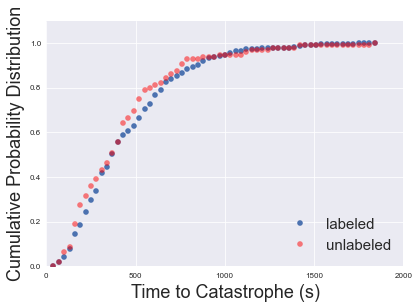

In [20]:
_ = plt.plot(timepoints, normalized_labeled , marker="o", linestyle = "None")
_ = plt.plot(timepoints, normalized_unlabeled, marker = "o", linestyle ="None", color="red", alpha = 0.5)

plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Cumulative Probability Distribution')
plt.ylim(0,1.1)
# # Add a legend
plt.legend(('labeled', 'unlabeled'), loc='lower right', prop={"size":15})

plt.draw()
plt.show()

As compared to a stepwise histogram to represent data, a cumulative frequency dot-plot has its own advantages and disadvantages.
0. **Experiments that involve a time-lapse:** As can be seen in the step-wise histogram generated in 2d, there was a time lapse between the data entries from the two groups, "labeled" and "unlabeled." That time lapse becomes obvious when you plot it using cumulative step-ise histograms. However, if the time lapse is high, it would result in a somewhat skewed plot, making it difficult to notice trends in the dataset.
However, the advantage of using a dotplot is that one can represent data by selecting a common maximum value, such that even if there is a time-lapse, there would be no skewness in the plot.
1. **Big datasets:** The problem with using dotplots is that one has to manually calculate all cumulative frequencies, which in this case has been done using a for loop. This increases the complexity of the algorithm, which would highly affect the efficiency of the code once the dataset is large.
2. **Easier on the eyes:** We think that a dot plot is easier on the eyes as compared to the step-wise histogram. One has a better chance of noticing any obvious trends in the dataset when looking at a cumulative frequency dotplot. Also, changing bin size in a step-wise histogram can mask major trends in the data, which can be taken care of using dotplots. 

To sum up, we would prefer representing datasets as cumulative frequency dot plots as compared to step-wise histograms provided that the dataset is big.